In [19]:
# Import modules

import numpy as np  # Numerical Python package
import matplotlib.pyplot as plt # Python plotting package
# Import
import response_spectrum as rsp # Response Spectra tools
import intensity_measures as ims # Intensity Measure Tools


periods = np.array([0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19,
                    0.20, 0.22, 0.24, 0.26, 0.28, 0.30, 0.32, 0.34, 0.36, 0.38, 0.40, 0.42, 0.44, 0.46, 0.48, 0.5, 
                    0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 
                    1.9, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0, 5.5, 6.0, 
                    6.5, 7.0,7.5, 8.0, 8.5, 9.0, 9.5, 10.0], dtype=float)
number_periods = len(periods)
import linecache

In [10]:
import os  
def GetFileList(FindPath,FlagStr=[]):  
    FileList=[]  
    FileNames=os.listdir(FindPath)  
    if (len(FileNames)>0):  
       for fn in FileNames:
        if os.path.splitext(fn)[1] == '.txt':  
           if (len(FlagStr)>0):  
               if (IsSubString(FlagStr,fn)):  
                   fullfilename=os.path.join(FindPath,fn)  
                   FileList.append(fullfilename)  
           else:   
               fullfilename=os.path.join(FindPath,fn)  
               FileList.append(fullfilename)           
    return FileList 

In [11]:
FileNames=os.listdir('H:\\1_hualian_data')  


In [20]:
'''
def getacc(fnm,startnum,endnum):
    f = open(fnm)
    data =[]
    for line in f.readlines()[startnum:endnum]:
        line=line.strip('\n').strip()
        tmp = line.split() 
        lists= map(float, tmp)   
        for i in lists:
            data.append(i/10)   
            acc = np.array(data)
    f.close()
    return acc  
'''
def getacc(fnm):
    data = linecache.getlines(fnm)
    count = len(data)
    ud = []
    ns = []
    ew = []
    for line in data[12:count]:
        line = line.strip('\n').strip(' ')
        s = line.split()
        ud.append(s[1])
        ew.append(s[2])
        ns.append(s[3])
        UD = map(float, ud) 
        NS = map(float, ns) 
        EW = map(float, ew) 
    UD = np.array(UD)
    EW = np.array(EW)
    NS = np.array(NS)
    return UD,NS,EW

In [24]:
filelist = GetFileList('H:\\1_hualian_data')
i = 10
UD,NS,EW = getacc(filelist[i])
time_step = 0.02
pga, pgv, pgd, _, _ = ims.get_peak_measures(time_step, UD, True, True)

NameError: name 'time_step' is not defined

In [6]:
filelist = GetFileList('H:\\1_hualian_data')
i = 10
print i
fnm = filelist[i]
nm = fnm[31:58]
acc1 = getacc(fnm,27,846)
acc2 = getacc(fnm,2513,3332)
acc3 = getacc(fnm,4999,5818)
time_step = 0.02
print "###############################################"
print "file name is %s " % fnm
print "###############################################"
print "###########     H1       ######################"
print "###############################################"
pga, pgv, pgd, _, _ = ims.get_peak_measures(time_step, acc1, True, True)
print "PGA = %10.4f cm/s/s,  PGV = %10.4f cm/s,   PGD = %10.4f cm" % (pga, pgv, pgd)
print "Bracketed Duration (> 5 cm/s/s) = %9.3f s" % ims.get_bracketed_duration(acc1, time_step, 5.0)
print "Uniform Duration (> 5 cm/s/s) = %9.3f s" % ims.get_uniform_duration(acc1, time_step, 5.0)
print "Significant Duration (5 - 95 Arias ) = %9.3f s" % ims.get_significant_duration(acc1, time_step, 0.05, 0.95)
print "CAV = %12.4f cm-s" % ims.get_cav(acc1, time_step)
print "CAV5 = %12.4f cm-s" % ims.get_cav(acc1, time_step, threshold=5.0)
print "Arias Intensity = %12.4f cm-s" % ims.get_arias_intensity(acc1, time_step)
print "Arias Intensity (5 - 95) = %12.4f cm-s" % ims.get_arias_intensity(acc1, time_step, 0.05, 0.95)
print "Arms = %12.4f cm-s" % ims.get_arms(acc1, time_step)
print "###############################################"
print "###########     H2       ######################"
print "###############################################"
pga, pgv, pgd, _, _ = ims.get_peak_measures(time_step, acc2, True, True)
print "PGA = %10.4f cm/s/s,  PGV = %10.4f cm/s,   PGD = %10.4f cm" % (pga, pgv, pgd)
print "Bracketed Duration (> 5 cm/s/s) = %9.3f s" % ims.get_bracketed_duration(acc2, time_step, 5.0)
print "Uniform Duration (> 5 cm/s/s) = %9.3f s" % ims.get_uniform_duration(acc2, time_step, 5.0)
print "Significant Duration (5 - 95 Arias ) = %9.3f s" % ims.get_significant_duration(acc2, time_step, 0.05, 0.95)
print "Arias Intensity = %12.4f cm-s" % ims.get_arias_intensity(acc2, time_step)
print "Arias Intensity (5 - 95) = %12.4f cm-s" % ims.get_arias_intensity(acc2, time_step, 0.05, 0.95)
print "CAV = %12.4f cm-s" % ims.get_cav(acc2, time_step)
print "CAV5 = %12.4f cm-s" % ims.get_cav(acc2, time_step, threshold=5.0)
print "Arms = %12.4f cm-s" % ims.get_arms(acc2, time_step)
print "###############################################"
print "###########     V        ######################"
print "###############################################"
pga, pgv, pgd, _, _ = ims.get_peak_measures(time_step, acc3, True, True)
print "PGA = %10.4f cm/s/s,  PGV = %10.4f cm/s,   PGD = %10.4f cm" % (pga, pgv, pgd)
print "Bracketed Duration (> 5 cm/s/s) = %9.3f s" % ims.get_bracketed_duration(acc3, time_step, 5.0)
print "Uniform Duration (> 5 cm/s/s) = %9.3f s" % ims.get_uniform_duration(acc3, time_step, 5.0)
print "Significant Duration (5 - 95 Arias ) = %9.3f s" % ims.get_significant_duration(acc3, time_step, 0.05, 0.95)
print "Arias Intensity = %12.4f cm-s" % ims.get_arias_intensity(acc3, time_step)
print "Arias Intensity (5 - 95) = %12.4f cm-s" % ims.get_arias_intensity(acc3, time_step, 0.05, 0.95)
print "CAV = %12.4f cm-s" % ims.get_cav(acc3, time_step)
print "CAV5 = %12.4f cm-s" % ims.get_cav(acc3, time_step, threshold=5.0)    
print "Arms = %12.4f cm-s" % ims.get_arms(acc3, time_step)
print "%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%"
print "%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%" 

10
###############################################
file name is F:\eq_data\newzealand\Vol2\data\20161113_110308_AMBC_20.V2A 
###############################################
###########     H1       ######################
###############################################
PGA =    74.4300 cm/s/s,  PGV =    15.8069 cm/s,   PGD =     5.9671 cm
Bracketed Duration (> 5 cm/s/s) =   110.840 s
Uniform Duration (> 5 cm/s/s) =    63.460 s
Significant Duration (5 - 95 Arias ) =    92.100 s
CAV =     952.6024 cm-s
CAV5 =     830.4092 cm-s
Arias Intensity =      25.7250 cm-s
Arias Intensity (5 - 95) =      23.1208 cm-s
Arms =       9.9074 cm-s
###############################################
###########     H2       ######################
###############################################
PGA =    64.4500 cm/s/s,  PGV =    14.2641 cm/s,   PGD =     5.5649 cm
Bracketed Duration (> 5 cm/s/s) =   110.640 s
Uniform Duration (> 5 cm/s/s) =    65.700 s
Significant Duration (5 - 95 Arias ) =    91.380 s
Arias In

C:\Users\aicesun\Anaconda2\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


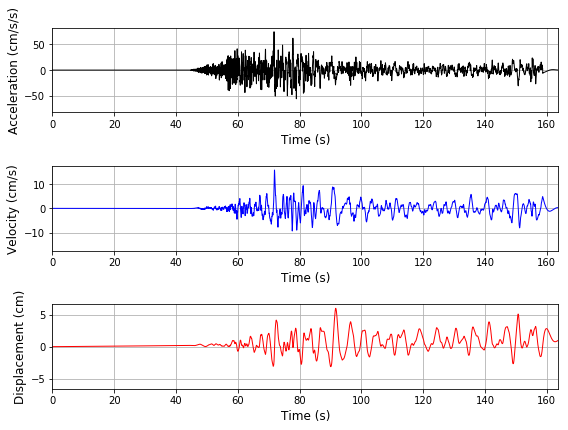

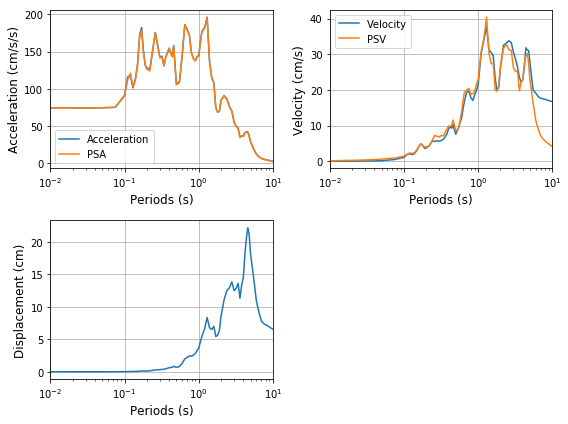

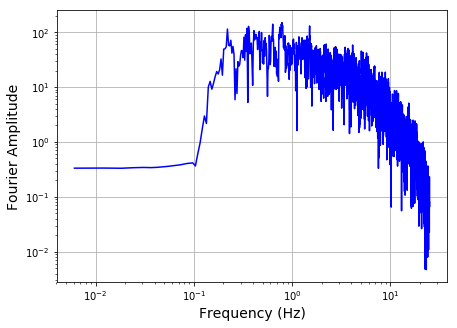

In [7]:
rsp.plot_time_series (acc1,time_step,linewidth =1)
nigam_jennings = rsp.NigamJennings(acc1, time_step, periods, damping=0.05, units="cm/s/s")
sax, time_series, acc, vel, dis = nigam_jennings.evaluate()
rsp.plot_response_spectra(sax, axis_type="semilogx")
ims.plot_fourier_spectrum(acc1, time_step)

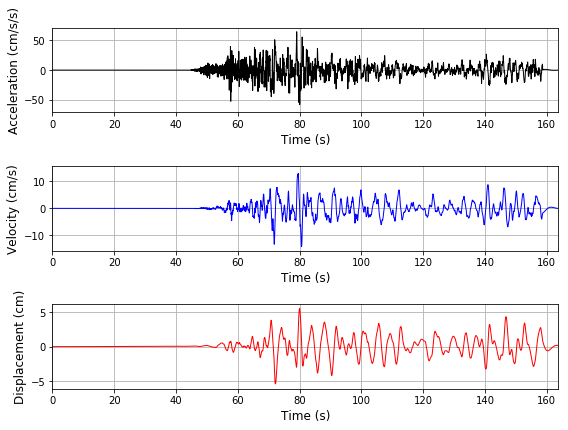

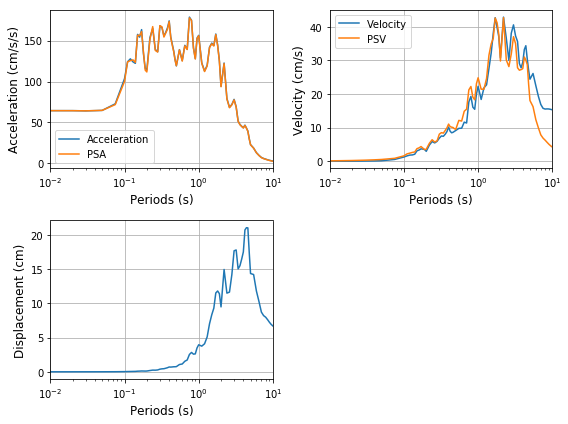

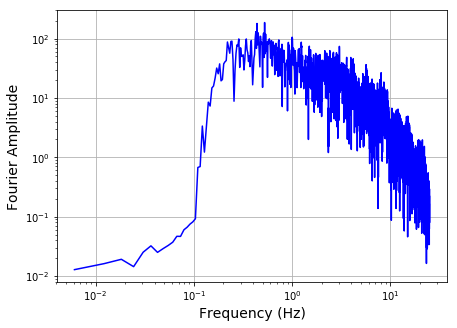

In [8]:
rsp.plot_time_series (acc2,time_step,linewidth =1)
nigam_jennings = rsp.NigamJennings(acc2, time_step, periods, damping=0.05, units="cm/s/s")
sax, time_series, acc, vel, dis = nigam_jennings.evaluate()
rsp.plot_response_spectra(sax, axis_type="semilogx")
ims.plot_fourier_spectrum(acc2, time_step)

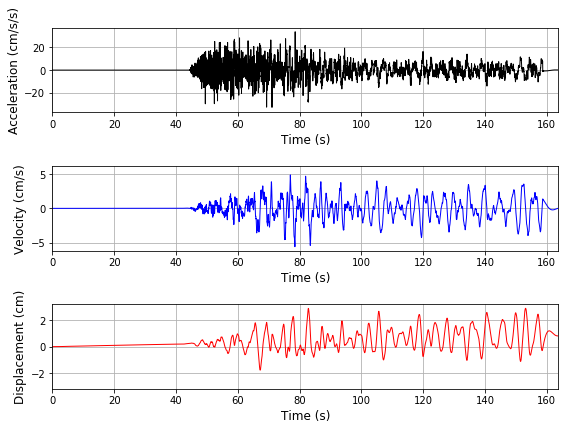

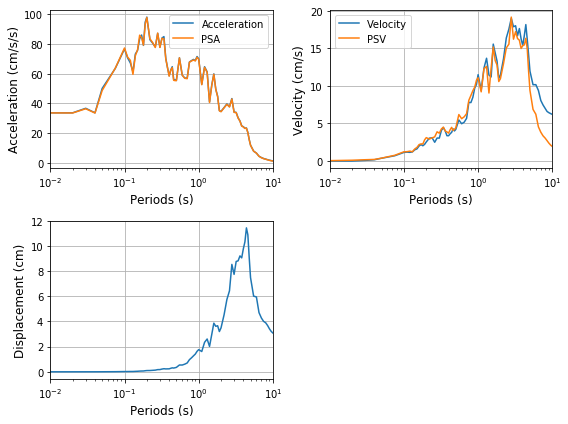

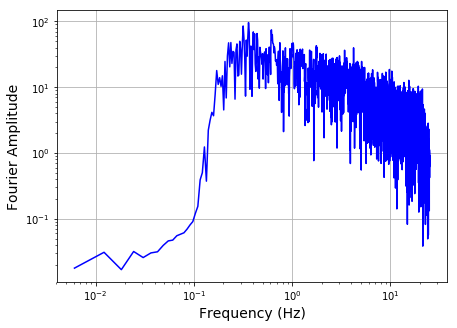

In [9]:
rsp.plot_time_series (acc3,time_step,linewidth =1)
nigam_jennings = rsp.NigamJennings(acc3, time_step, periods, damping=0.05, units="cm/s/s")
sax, time_series, acc, vel, dis = nigam_jennings.evaluate()
rsp.plot_response_spectra(sax, axis_type="semilogx")
ims.plot_fourier_spectrum(acc3, time_step)

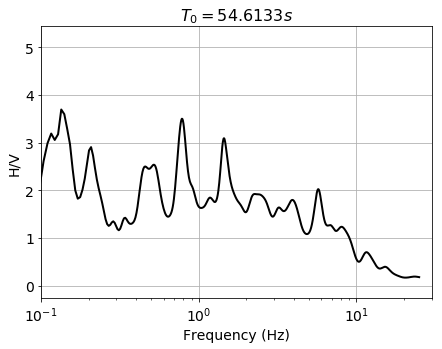

In [17]:
# Setup parameters
params = {"Function": "KonnoOhmachi","bandwidth": 40.0,"count": 1.0,"normalize": True}
# Returns
# 1. Horizontal to Vertical Spectral Ratio
# 2. Frequency
# 3. Maximum H/V
# 4. Period of Maximum H/V
hvsr, freq, max_hv, t_0 = ims.get_hvsr(acc1, time_step, acc2, time_step, acc3, time_step, params)

plt.figure(figsize=(7,5))
plt.semilogx(freq, hvsr, 'k-', lw=2.0)
# Show T0
t_0_line = np.array([[t_0, 0.0],
                     [t_0, 1.1 * max_hv]])
plt.semilogx(1.0 / t_0_line[:, 0], t_0_line[:, 1], "r--", lw=1.5)
plt.xlabel("Frequency (Hz)", fontsize=14)
plt.ylabel("H/V", fontsize=14)
plt.tick_params(labelsize=14)
plt.xlim(0.1, 30.0)
plt.grid(True)
plt.title(r"$T_0 = %.4f s$" % t_0, fontsize=16)
plt.show()
#plt.savefig("images/hvsr_example1.pdf", format="pdf", dpi=300)

### 批量运算

In [10]:
filelist = GetFileList('F:\\eq_data\\newzealand\\Vol2\\data')
for i in range(len(filelist)):
    print i
    fnm = filelist[i]
    nm = fnm.split('_')
    acc1 = getacc(fnm,27,846)
    acc2 = getacc(fnm,2513,3332)
    acc3 = getacc(fnm,4999,5818)
    time_step = 0.02
    print "###############################################"
    print "file name is %s " % nm[2]
    print "###############################################"
    print "###########     H1       ######################"
    print "###############################################"
    pga1, pgv1, pgd1, _, _ = ims.get_peak_measures(time_step, acc1, True, True)
    print "PGA = %10.4f cm/s/s,  PGV = %10.4f cm/s,   PGD = %10.4f cm" % (pga1, pgv1, pgd1)
    print "Bracketed Duration (> 5 cm/s/s) = %9.3f s" % ims.get_bracketed_duration(acc1, time_step, 5.0)
    print "Uniform Duration (> 5 cm/s/s) = %9.3f s" % ims.get_uniform_duration(acc1, time_step, 5.0)
    print "Significant Duration (5 - 95 Arias ) = %9.3f s" % ims.get_significant_duration(acc1, time_step, 0.05, 0.95)
    print "CAV = %12.4f cm-s" % ims.get_cav(acc1, time_step)
    print "CAV5 = %12.4f cm-s" % ims.get_cav(acc1, time_step, threshold=5.0)
    print "Arias Intensity = %12.4f cm-s" % ims.get_arias_intensity(acc1, time_step)
    print "Arias Intensity (5 - 95) = %12.4f cm-s" % ims.get_arias_intensity(acc1, time_step, 0.05, 0.95)
    print "Arms = %12.4f cm-s" % ims.get_arms(acc1, time_step)
    print "###############################################"
    print "###########     H2       ######################"
    print "###############################################"
    pga2, pgv2, pgd2, _, _ = ims.get_peak_measures(time_step, acc2, True, True)
    print "PGA = %10.4f cm/s/s,  PGV = %10.4f cm/s,   PGD = %10.4f cm" % (pga2, pgv2, pgd2)
    print "Bracketed Duration (> 5 cm/s/s) = %9.3f s" % ims.get_bracketed_duration(acc2, time_step, 5.0)
    print "Uniform Duration (> 5 cm/s/s) = %9.3f s" % ims.get_uniform_duration(acc2, time_step, 5.0)
    print "Significant Duration (5 - 95 Arias ) = %9.3f s" % ims.get_significant_duration(acc2, time_step, 0.05, 0.95)
    print "Arias Intensity = %12.4f cm-s" % ims.get_arias_intensity(acc2, time_step)
    print "Arias Intensity (5 - 95) = %12.4f cm-s" % ims.get_arias_intensity(acc2, time_step, 0.05, 0.95)
    print "CAV = %12.4f cm-s" % ims.get_cav(acc2, time_step)
    print "CAV5 = %12.4f cm-s" % ims.get_cav(acc2, time_step, threshold=5.0)
    print "Arms = %12.4f cm-s" % ims.get_arms(acc2, time_step)
    print "###############################################"
    print "###########     V        ######################"
    print "###############################################"
    pga3, pgv3, pgd3, _, _ = ims.get_peak_measures(time_step, acc3, True, True)
    print "PGA = %10.4f cm/s/s,  PGV = %10.4f cm/s,   PGD = %10.4f cm" % (pga3, pgv3, pgd3)
    print "Bracketed Duration (> 5 cm/s/s) = %9.3f s" % ims.get_bracketed_duration(acc3, time_step, 5.0)
    print "Uniform Duration (> 5 cm/s/s) = %9.3f s" % ims.get_uniform_duration(acc3, time_step, 5.0)
    print "Significant Duration (5 - 95 Arias ) = %9.3f s" % ims.get_significant_duration(acc3, time_step, 0.05, 0.95)
    print "Arias Intensity = %12.4f cm-s" % ims.get_arias_intensity(acc3, time_step)
    print "Arias Intensity (5 - 95) = %12.4f cm-s" % ims.get_arias_intensity(acc3, time_step, 0.05, 0.95)
    print "CAV = %12.4f cm-s" % ims.get_cav(acc3, time_step)
    print "CAV5 = %12.4f cm-s" % ims.get_cav(acc3, time_step, threshold=5.0)    
    print "Arms = %12.4f cm-s" % ims.get_arms(acc3, time_step)
    print "%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%"
    print "%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%" 
    
    flnm = open(nm[2],'w')
    print >> flnm ,"H-1:"
    print >> flnm ,"PGA = %10.4f cm/s/s,  PGV = %10.4f cm/s,   PGD = %10.4f cm" % (pga1, pgv1, pgd1)
    print >> flnm ,"Bracketed Duration (> 5 cm/s/s) = %9.3f s" % ims.get_bracketed_duration(acc1, time_step, 5.0)
    print >> flnm ,"Uniform Duration (> 5 cm/s/s) = %9.3f s" % ims.get_uniform_duration(acc1, time_step, 5.0)
    print >> flnm ,"Significant Duration (5 - 95 Arias ) = %9.3f s" % ims.get_significant_duration(acc1, 
                                                                                                   time_step, 0.05, 0.95)
    print >> flnm ,"CAV = %12.4f cm-s" % ims.get_cav(acc1, time_step)
    print >> flnm ,"CAV5 = %12.4f cm-s" % ims.get_cav(acc1, time_step, threshold=5.0)
    print >> flnm ,"Arias Intensity = %12.4f cm-s" % ims.get_arias_intensity(acc1, time_step)
    print >> flnm ,"Arias Intensity (5 - 95) = %12.4f cm-s" % ims.get_arias_intensity(acc1, time_step, 0.05, 0.95)
    print >> flnm ,"Arms = %12.4f cm-s" % ims.get_arms(acc1, time_step)
    
    print >> flnm ,"H-2:"   
    print >> flnm ,"PGA = %10.4f cm/s/s,  PGV = %10.4f cm/s,   PGD = %10.4f cm" % (pga2, pgv2, pgd2)
    print >> flnm ,"Bracketed Duration (> 5 cm/s/s) = %9.3f s" % ims.get_bracketed_duration(acc2, time_step, 5.0)
    print >> flnm ,"Uniform Duration (> 5 cm/s/s) = %9.3f s" % ims.get_uniform_duration(acc2, time_step, 5.0)
    print >> flnm ,"Significant Duration (5 - 95 Arias ) = %9.3f s" % ims.get_significant_duration(acc2, 
                                                                                                   time_step, 0.05, 0.95)
    print >> flnm ,"CAV = %12.4f cm-s" % ims.get_cav(acc2, time_step)
    print >> flnm ,"CAV5 = %12.4f cm-s" % ims.get_cav(acc2, time_step, threshold=5.0)
    print >> flnm ,"Arias Intensity = %12.4f cm-s" % ims.get_arias_intensity(acc2, time_step)
    print >> flnm ,"Arias Intensity (5 - 95) = %12.4f cm-s" % ims.get_arias_intensity(acc2, time_step, 0.05, 0.95)
    print >> flnm ,"Arms = %12.4f cm-s" % ims.get_arms(acc2, time_step)
    
    print >> flnm ,"V:"   
    print >> flnm ,"PGA = %10.4f cm/s/s,  PGV = %10.4f cm/s,   PGD = %10.4f cm" % (pga3, pgv3, pgd3)
    print >> flnm ,"Bracketed Duration (> 5 cm/s/s) = %9.3f s" % ims.get_bracketed_duration(acc3, time_step, 5.0)
    print >> flnm ,"Uniform Duration (> 5 cm/s/s) = %9.3f s" % ims.get_uniform_duration(acc3, time_step, 5.0)
    print >> flnm ,"Significant Duration (5 - 95 Arias ) = %9.3f s" % ims.get_significant_duration(acc3, 
                                                                                                   time_step, 0.05, 0.95)
    print >> flnm ,"CAV = %12.4f cm-s" % ims.get_cav(acc3, time_step)
    print >> flnm ,"CAV5 = %12.4f cm-s" % ims.get_cav(acc3, time_step, threshold=5.0)
    print >> flnm ,"Arias Intensity = %12.4f cm-s" % ims.get_arias_intensity(acc3, time_step)
    print >> flnm ,"Arias Intensity (5 - 95) = %12.4f cm-s" % ims.get_arias_intensity(acc3, time_step, 0.05, 0.95)
    print >> flnm ,"Arms = %12.4f cm-s" % ims.get_arms(acc3, time_step)
    
    flnm.close()


0
###############################################
file name is 110259 
###############################################
###########     H1       ######################
###############################################
PGA =   973.3100 cm/s/s,  PGV =   100.8156 cm/s,   PGD =    22.8649 cm
Bracketed Duration (> 5 cm/s/s) =   113.760 s
Uniform Duration (> 5 cm/s/s) =    88.520 s
Significant Duration (5 - 95 Arias ) =    18.640 s
CAV =    4162.2360 cm-s
CAV5 =    4091.0972 cm-s
Arias Intensity =    1356.8507 cm-s
Arias Intensity (5 - 95) =    1220.1334 cm-s
Arms =      71.9529 cm-s
###############################################
###########     H2       ######################
###############################################
PGA =   796.6400 cm/s/s,  PGV =    68.4364 cm/s,   PGD =    13.3694 cm
Bracketed Duration (> 5 cm/s/s) =   113.700 s
Uniform Duration (> 5 cm/s/s) =    83.680 s
Significant Duration (5 - 95 Arias ) =    21.100 s
Arias Intensity =     928.0993 cm-s
Arias Intensity (5 - 95) =

###############################################
file name is 110304 
###############################################
###########     H1       ######################
###############################################
PGA =   144.9500 cm/s/s,  PGV =    16.5552 cm/s,   PGD =     3.6018 cm
Bracketed Duration (> 5 cm/s/s) =   102.800 s
Uniform Duration (> 5 cm/s/s) =    80.860 s
Significant Duration (5 - 95 Arias ) =    89.580 s
CAV =    1827.8461 cm-s
CAV5 =    1768.2208 cm-s
Arias Intensity =      97.9316 cm-s
Arias Intensity (5 - 95) =      88.1041 cm-s
Arms =      19.3305 cm-s
###############################################
###########     H2       ######################
###############################################
PGA =   171.2000 cm/s/s,  PGV =    20.1645 cm/s,   PGD =     4.7781 cm
Bracketed Duration (> 5 cm/s/s) =   102.600 s
Uniform Duration (> 5 cm/s/s) =    80.700 s
Significant Duration (5 - 95 Arias ) =    89.780 s
Arias Intensity =     128.5702 cm-s
Arias Intensity (5 - 95) =  

###############################################
file name is 110308 
###############################################
###########     H1       ######################
###############################################
PGA =    74.4300 cm/s/s,  PGV =    15.8069 cm/s,   PGD =     5.9671 cm
Bracketed Duration (> 5 cm/s/s) =   110.840 s
Uniform Duration (> 5 cm/s/s) =    63.460 s
Significant Duration (5 - 95 Arias ) =    92.100 s
CAV =     952.6024 cm-s
CAV5 =     830.4092 cm-s
Arias Intensity =      25.7250 cm-s
Arias Intensity (5 - 95) =      23.1208 cm-s
Arms =       9.9074 cm-s
###############################################
###########     H2       ######################
###############################################
PGA =    64.4500 cm/s/s,  PGV =    14.2641 cm/s,   PGD =     5.5649 cm
Bracketed Duration (> 5 cm/s/s) =   110.640 s
Uniform Duration (> 5 cm/s/s) =    65.700 s
Significant Duration (5 - 95 Arias ) =    91.380 s
Arias Intensity =      24.3269 cm-s
Arias Intensity (5 - 95) =  

###############################################
file name is 110312 
###############################################
###########     H1       ######################
###############################################
PGA =    74.7900 cm/s/s,  PGV =     7.2408 cm/s,   PGD =     5.5242 cm
Bracketed Duration (> 5 cm/s/s) =   107.980 s
Uniform Duration (> 5 cm/s/s) =    73.280 s
Significant Duration (5 - 95 Arias ) =    86.000 s
CAV =    1230.2704 cm-s
CAV5 =    1138.6424 cm-s
Arias Intensity =      40.0483 cm-s
Arias Intensity (5 - 95) =      36.0100 cm-s
Arms =      12.3616 cm-s
###############################################
###########     H2       ######################
###############################################
PGA =    64.1400 cm/s/s,  PGV =     7.7647 cm/s,   PGD =     4.7324 cm
Bracketed Duration (> 5 cm/s/s) =   110.040 s
Uniform Duration (> 5 cm/s/s) =    76.240 s
Significant Duration (5 - 95 Arias ) =    89.300 s
Arias Intensity =      35.5353 cm-s
Arias Intensity (5 - 95) =  

###############################################
file name is 110314 
###############################################
###########     H1       ######################
###############################################
PGA =    28.7000 cm/s/s,  PGV =     5.0499 cm/s,   PGD =     2.9978 cm
Bracketed Duration (> 5 cm/s/s) =   108.200 s
Uniform Duration (> 5 cm/s/s) =    34.220 s
Significant Duration (5 - 95 Arias ) =    90.660 s
CAV =     455.1150 cm-s
CAV5 =     283.4722 cm-s
Arias Intensity =       5.1577 cm-s
Arias Intensity (5 - 95) =       4.6402 cm-s
Arms =       4.4362 cm-s
###############################################
###########     H2       ######################
###############################################
PGA =    25.9300 cm/s/s,  PGV =     5.8804 cm/s,   PGD =     3.9786 cm
Bracketed Duration (> 5 cm/s/s) =   109.480 s
Uniform Duration (> 5 cm/s/s) =    42.020 s
Significant Duration (5 - 95 Arias ) =    94.760 s
Arias Intensity =       6.2685 cm-s
Arias Intensity (5 - 95) =  

###############################################
file name is 110314 
###############################################
###########     H1       ######################
###############################################
PGA =    34.4600 cm/s/s,  PGV =     7.2263 cm/s,   PGD =     3.8806 cm
Bracketed Duration (> 5 cm/s/s) =   108.840 s
Uniform Duration (> 5 cm/s/s) =    56.360 s
Significant Duration (5 - 95 Arias ) =    82.480 s
CAV =     720.1004 cm-s
CAV5 =     589.3830 cm-s
Arias Intensity =      12.8346 cm-s
Arias Intensity (5 - 95) =      11.5458 cm-s
Arms =       6.9980 cm-s
###############################################
###########     H2       ######################
###############################################
PGA =    32.4000 cm/s/s,  PGV =     7.2156 cm/s,   PGD =     4.1332 cm
Bracketed Duration (> 5 cm/s/s) =   108.540 s
Uniform Duration (> 5 cm/s/s) =    55.460 s
Significant Duration (5 - 95 Arias ) =    91.720 s
Arias Intensity =      11.5163 cm-s
Arias Intensity (5 - 95) =  

###############################################
file name is 110315 
###############################################
###########     H1       ######################
###############################################
PGA =    18.4500 cm/s/s,  PGV =     2.6662 cm/s,   PGD =     1.0494 cm
Bracketed Duration (> 5 cm/s/s) =   105.220 s
Uniform Duration (> 5 cm/s/s) =    21.620 s
Significant Duration (5 - 95 Arias ) =    87.640 s
CAV =     345.5751 cm-s
CAV5 =     157.8388 cm-s
Arias Intensity =       2.9063 cm-s
Arias Intensity (5 - 95) =       2.6128 cm-s
Arms =       3.3301 cm-s
###############################################
###########     H2       ######################
###############################################
PGA =    17.9200 cm/s/s,  PGV =     2.6439 cm/s,   PGD =     1.1769 cm
Bracketed Duration (> 5 cm/s/s) =   104.460 s
Uniform Duration (> 5 cm/s/s) =    24.500 s
Significant Duration (5 - 95 Arias ) =    87.780 s
Arias Intensity =       3.2495 cm-s
Arias Intensity (5 - 95) =  

###############################################
file name is 110315 
###############################################
###########     H1       ######################
###############################################
PGA =    27.6300 cm/s/s,  PGV =     2.9876 cm/s,   PGD =     1.0074 cm
Bracketed Duration (> 5 cm/s/s) =   109.360 s
Uniform Duration (> 5 cm/s/s) =    28.060 s
Significant Duration (5 - 95 Arias ) =    88.740 s
CAV =     420.0330 cm-s
CAV5 =     242.6391 cm-s
Arias Intensity =       4.8842 cm-s
Arias Intensity (5 - 95) =       4.3952 cm-s
Arms =       4.3170 cm-s
###############################################
###########     H2       ######################
###############################################
PGA =    28.1700 cm/s/s,  PGV =     3.4101 cm/s,   PGD =     1.1727 cm
Bracketed Duration (> 5 cm/s/s) =   110.540 s
Uniform Duration (> 5 cm/s/s) =    26.840 s
Significant Duration (5 - 95 Arias ) =    94.480 s
Arias Intensity =       4.6224 cm-s
Arias Intensity (5 - 95) =  

###############################################
file name is 110315 
###############################################
###########     H1       ######################
###############################################
PGA =    37.5400 cm/s/s,  PGV =     7.0825 cm/s,   PGD =     3.2525 cm
Bracketed Duration (> 5 cm/s/s) =   110.280 s
Uniform Duration (> 5 cm/s/s) =    61.040 s
Significant Duration (5 - 95 Arias ) =    89.380 s
CAV =     793.9888 cm-s
CAV5 =     665.4473 cm-s
Arias Intensity =      14.9352 cm-s
Arias Intensity (5 - 95) =      13.4375 cm-s
Arms =       7.5490 cm-s
###############################################
###########     H2       ######################
###############################################
PGA =    38.6700 cm/s/s,  PGV =     8.2455 cm/s,   PGD =     4.6429 cm
Bracketed Duration (> 5 cm/s/s) =   110.700 s
Uniform Duration (> 5 cm/s/s) =    63.320 s
Significant Duration (5 - 95 Arias ) =    91.280 s
Arias Intensity =      15.6195 cm-s
Arias Intensity (5 - 95) =  

###############################################
file name is 110316 
###############################################
###########     H1       ######################
###############################################
PGA =   118.4400 cm/s/s,  PGV =    16.4702 cm/s,   PGD =     4.6805 cm
Bracketed Duration (> 5 cm/s/s) =   108.540 s
Uniform Duration (> 5 cm/s/s) =    82.560 s
Significant Duration (5 - 95 Arias ) =    77.800 s
CAV =    1781.9054 cm-s
CAV5 =    1711.8578 cm-s
Arias Intensity =      83.1312 cm-s
Arias Intensity (5 - 95) =      74.7462 cm-s
Arms =      17.8100 cm-s
###############################################
###########     H2       ######################
###############################################
PGA =   105.4300 cm/s/s,  PGV =    13.9495 cm/s,   PGD =     4.6733 cm
Bracketed Duration (> 5 cm/s/s) =   108.140 s
Uniform Duration (> 5 cm/s/s) =    85.020 s
Significant Duration (5 - 95 Arias ) =    82.360 s
Arias Intensity =      85.0299 cm-s
Arias Intensity (5 - 95) =  

###############################################
file name is 110316 
###############################################
###########     H1       ######################
###############################################
PGA =    11.6500 cm/s/s,  PGV =     3.4558 cm/s,   PGD =     1.9168 cm
Bracketed Duration (> 5 cm/s/s) =    93.280 s
Uniform Duration (> 5 cm/s/s) =    12.500 s
Significant Duration (5 - 95 Arias ) =    87.280 s
CAV =     263.9936 cm-s
CAV5 =      81.1028 cm-s
Arias Intensity =       1.6955 cm-s
Arias Intensity (5 - 95) =       1.5255 cm-s
Arms =       2.5435 cm-s
###############################################
###########     H2       ######################
###############################################
PGA =    10.4100 cm/s/s,  PGV =     2.8945 cm/s,   PGD =     1.8167 cm
Bracketed Duration (> 5 cm/s/s) =    92.040 s
Uniform Duration (> 5 cm/s/s) =     7.840 s
Significant Duration (5 - 95 Arias ) =    85.160 s
Arias Intensity =       1.2825 cm-s
Arias Intensity (5 - 95) =  

###############################################
file name is 110316 
###############################################
###########     H1       ######################
###############################################
PGA =    20.8200 cm/s/s,  PGV =     3.0739 cm/s,   PGD =     1.1527 cm
Bracketed Duration (> 5 cm/s/s) =   104.480 s
Uniform Duration (> 5 cm/s/s) =    16.280 s
Significant Duration (5 - 95 Arias ) =    87.660 s
CAV =     312.3146 cm-s
CAV5 =     121.3665 cm-s
Arias Intensity =       2.4591 cm-s
Arias Intensity (5 - 95) =       2.2115 cm-s
Arms =       3.0632 cm-s
###############################################
###########     H2       ######################
###############################################
PGA =    12.8800 cm/s/s,  PGV =     1.9127 cm/s,   PGD =     1.4889 cm
Bracketed Duration (> 5 cm/s/s) =    99.360 s
Uniform Duration (> 5 cm/s/s) =     6.800 s
Significant Duration (5 - 95 Arias ) =    90.440 s
Arias Intensity =       1.2142 cm-s
Arias Intensity (5 - 95) =  

###############################################
file name is 110317 
###############################################
###########     H1       ######################
###############################################
PGA =    12.6900 cm/s/s,  PGV =     2.6793 cm/s,   PGD =     1.8121 cm
Bracketed Duration (> 5 cm/s/s) =   104.980 s
Uniform Duration (> 5 cm/s/s) =    11.640 s
Significant Duration (5 - 95 Arias ) =    89.920 s
CAV =     266.4609 cm-s
CAV5 =      75.5038 cm-s
Arias Intensity =       1.6705 cm-s
Arias Intensity (5 - 95) =       1.5029 cm-s
Arms =       2.5247 cm-s
###############################################
###########     H2       ######################
###############################################
PGA =    13.6500 cm/s/s,  PGV =     2.9606 cm/s,   PGD =     2.4812 cm
Bracketed Duration (> 5 cm/s/s) =   102.400 s
Uniform Duration (> 5 cm/s/s) =    13.160 s
Significant Duration (5 - 95 Arias ) =    89.300 s
Arias Intensity =       1.8610 cm-s
Arias Intensity (5 - 95) =  

ValueError: invalid literal for float(): -1484.5-10192.9

#### DATA

In [16]:
import string

filenm = []

PGA01=[]
PGA02=[]
PGA03=[]

PGV01=[]
PGV02=[]
PGV03=[]

PGD01=[]  
PGD02=[]  
PGD03=[]

BKduration01=[]
BKduration02=[]
BKduration03=[]

UNduration01=[]
UNduration02=[]
UNduration03=[]

SGduration01=[]
SGduration02=[]
SGduration03=[]

CAV01=[]
CAV02=[]
CAV03=[]

AI01=[]
AI02=[]
AI03=[]

filelist = GetFileList('F:\\eq_data\\newzealand\\Vol2\\data')
for i in np.arange(1,len(filelist),1):
    
    print i
    
    fnm = filelist[i]
    nm = fnm.split('_')
    acc1 = getacc(fnm,27,846)
    acc2 = getacc(fnm,2513,3332)
    acc3 = getacc(fnm,4999,5818)
    time_step = 0.02
    
    filenm.append(nm[2])
         
    pga1, pgv1, pgd1, _, _ = ims.get_peak_measures(time_step, acc1, True, True)
    pga2, pgv2, pgd2, _, _ = ims.get_peak_measures(time_step, acc2, True, True)
    pga3, pgv3, pgd3, _, _ = ims.get_peak_measures(time_step, acc3, True, True)
    
    # PGA 
    PGA01.append(round(pga1,3))
    PGA02.append(round(pga2,3))
    PGA03.append(round(pga3,3))
    
    # PGV 
    PGV01.append(round(pgv1,3))
    PGV02.append(round(pgv2,3))
    PGV03.append(round(pgv3,3))

    # PGD
    PGD01.append(round(pgd1,3))
    PGD02.append(round(pgd2,3))
    PGD03.append(round(pgd3,3))
    
    # Bracketed Duration
    bd1 = ims.get_bracketed_duration(acc1, time_step, 5.0)
    bd2 = ims.get_bracketed_duration(acc2, time_step, 5.0)
    bd3 = ims.get_bracketed_duration(acc3, time_step, 5.0)

    BKduration01.append(round(bd1,3))
    BKduration02.append(round(bd2,3))
    BKduration03.append(round(bd3,3))
    
    # Uniform Duration
    ud1 = ims.get_uniform_duration(acc1, time_step, 5.0)
    ud2 = ims.get_uniform_duration(acc2, time_step, 5.0)
    ud3 = ims.get_uniform_duration(acc3, time_step, 5.0)
    
    UNduration01.append(round(ud1,3))
    UNduration02.append(round(ud2,3))
    UNduration03.append(round(ud3,3))    
      
    # Significant Duration
    sd1 = ims.get_significant_duration(acc1, time_step, 0.05, 0.95)
    sd2 = ims.get_significant_duration(acc2, time_step, 0.05, 0.95)
    sd3 = ims.get_significant_duration(acc3, time_step, 0.05, 0.95)
 
    SGduration01.append(round(sd1,3))
    SGduration02.append(round(sd2,3))
    SGduration03.append(round(sd3,3))    
    
    # CAV
    cav1 = ims.get_cav(acc1, time_step)
    cav2 = ims.get_cav(acc2, time_step)
    cav3 = ims.get_cav(acc3, time_step)
    
    CAV01.append(round(cav1,3))
    CAV02.append(round(cav2,3))
    CAV03.append(round(cav3,3))
    
    # Arias Intensity
    ai1 = ims.get_arias_intensity(acc1, time_step)
    ai2 = ims.get_arias_intensity(acc2, time_step)
    ai3 = ims.get_arias_intensity(acc3, time_step)

    AI01.append(round(ai1,3))
    AI02.append(round(ai2,3))
    AI03.append(round(ai3,3))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223


### 保存

In [ ]:
flnm = open('PGA.txt','w')
for i in range(len(PGA01)):
    print >> flnm ,"%s,%10.4f,%10.4f,%10.4f" % (filenm[i],PGA01[i],PGA02[i],PGA03[i])
flnm.close()

flnm = open('PGV.txt','w')
for i in range(len(PGV01)):
    print >> flnm ,"%s,%10.4f,%10.4f,%10.4f" % (filenm[i],PGV01[i],PGV02[i],PGV03[i])
flnm.close()

flnm = open('PGD.txt','w')
for i in range(len(PGD01)):
    print >> flnm ,"%s,%10.4f,%10.4f,%10.4f" % (filenm[i],PGD01[i],PGD02[i],PGD03[i])
flnm.close()

flnm = open('CAV.txt','w')
for i in range(len(CAV01)):
    print >> flnm ,"%s,%10.4f,%10.4f,%10.4f" % (filenm[i],CAV01[i],CAV02[i],CAV03[i])
flnm.close()

flnm = open('AI.txt','w')
for i in range(len(AI01)):
    print >> flnm ,"%s,%10.4f,%10.4f,%10.4f" % (filenm[i],AI01[i],AI02[i],AI03[i])
flnm.close()

flnm = open('Bracketed_Duration.txt','w')
for i in range(len(BKduration01)):
    print >> flnm ,"%s,%10.4f,%10.4f,%10.4f" % (filenm[i],BKduration01[i],BKduration02[i],BKduration03[i])
flnm.close()

flnm = open('Significant_Duration.txt','w')
for i in range(len(SGduration01)):
    print >> flnm ,"%s,%10.4f,%10.4f,%10.4f" % (filenm[i],SGduration01[i],SGduration02[i],SGduration03[i])
flnm.close()


flnm = open('Uniform_Duration.txt','w')
for i in range(len(UNduration01)):
    print >> flnm ,"%s,%10.4f,%10.4f,%10.4f" % (filenm[i],UNduration01[i],UNduration02[i],UNduration03[i])
flnm.close()

In [18]:
from scipy.optimize import curve_fit
import numpy as np

def func(x, a, b):
    y = a * np.log10(x) + b
    return y

def polyfit(x, y, degree):
    results = {}
    #coeffs = numpy.polyfit(x, y, degree)
    popt, pcov = curve_fit(func, x, y)
    results['polynomial'] = popt

    # r-squared
    yhat = func(x ,popt[0] ,popt[1] )                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

def getmean(A,B):
    m = []
    n = []
    for p in A:
        m.append(p * 0.5)
    for q in B:
        n.append(q * 0.5)
    result = m + n
    return result

fit function is: y =     0.4585 * log10(x) +      2.1114


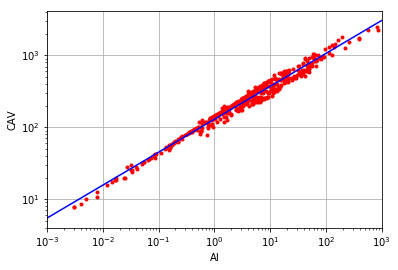

In [19]:
CAVH = getmean(CAV01 , CAV02) 
AIH = getmean(AI01 , AI02) 

CAVHH = np.log10(CAVH)

z1 = polyfit(AIH,CAVHH,2)

s1,s2 = z1['polynomial']
xx =  np.arange(0.001, 1000, 1)
res = 10 ** func(xx,s1,s2)
        
print "fit function is: y = %10.4f * log10(x) +  %10.4f" % (z1['polynomial'][0],z1['polynomial'][1])

plt.loglog(AIH,CAVH,'r.')
plt.loglog(xx,res,'b')

plt.grid(True) 
plt.xlim([0,1000])
plt.ylabel('CAV')
plt.xlabel('AI')
plt.show()

### 读取数据

In [198]:
Rrup = []
PGAH1 = []
PGAH2 = []
PGAH = []
PGAV = []

CAVH1 = []
CAVH2 = []
CAVH = []
CAVV = []

AIH1 = []
AIH2 = []
AIH = []
AIV = []

Vs30 = []

f = open('E:\\mywork_tmp\\NewZealand\\20171227\\data.txt','r')
count = 0
for line in f.readlines():
    line = line.strip('\n').strip()
    tmp = line.split() 
    
    Vs30.append(float(tmp[2]))
    
    Rrup.append(float(tmp[5]))
    
    PGAH1.append(float(tmp[6])/100)   ## gal
    PGAH2.append(float(tmp[7])/100)
    PGAH.append(np.mean([float(tmp[6]),float(tmp[7])])/100)
    PGAV.append(float(tmp[8])/100)
    
    CAVH1.append(float(tmp[9])/100)
    CAVH2.append(float(tmp[10]))   
    CAVH.append(np.mean([float(tmp[9]),float(tmp[10])])/100)
    CAVV.append(float(tmp[11])/100)

    AIH1.append(float(tmp[12])/100)
    AIH2.append(float(tmp[13])/100)
    AIH.append(np.mean([float(tmp[12]),float(tmp[13])])/100)
    AIV.append(float(tmp[14])/100)

    
    count = count + 1
f.close()

### 曲线拟合

In [208]:
from scipy.optimize import curve_fit
import numpy as np

def func(x,a, b,c):
    y = a * np.log10(x+b) + c
    return y

def polyfit(func,x, y):
    results = {}
    popt, pcov = curve_fit(func, x, y)
    results = popt
    return results

 # r-squared
def RMS(x,y,a,b,c):
    yhat = func(x,a,b,c)                         
    ybar = np.sum(y)/len(y)         
    ssreg = np.sum((yhat-ybar)**2)  
    sstot = np.sum((y - ybar)**2)    
    results = ssreg / sstot
    return results

### PGA

C:\Users\aicesun\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


fit function is: y =    -2.2280 * log10(x+ 29.225251) +      3.9886
r-squared is:     0.8410


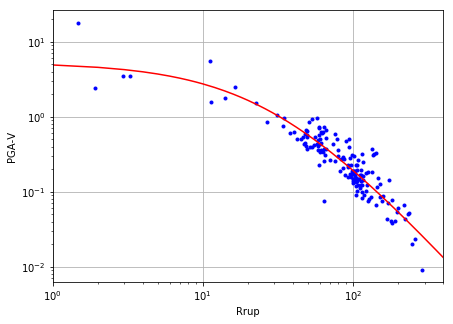

In [203]:
PGAVV = np.log10(PGAV)

z1,z2,z3 = polyfit(func,Rrup,PGAVV)

xx =  np.arange(1, 400, 1)
res = [10 ** func(i,z1,z2,z3) for i in xx]


print "fit function is: y = %10.4f * log10(x+%10f) +  %10.4f" % (z1,z2,z3)
print "r-squared is: %10.4f"  % (RMS(Rrup,PGAVV,z1,z2,z3))


plt.figure(figsize=(7,5))
plt.loglog(Rrup,PGAV,'b.')
plt.loglog(xx,res,'r-')
plt.xlim(1,400) 
plt.grid(True) 
plt.xlabel('Rrup')
plt.ylabel('PGA-V')
plt.show()

C:\Users\aicesun\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


fit function is: y =    -3.4048 * log10(x+ 74.871985) +      7.2426
r-squared is:     0.8029


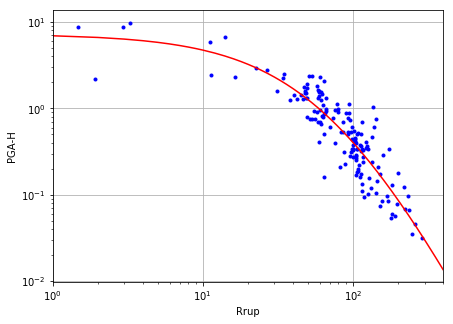

In [209]:
PGAHH = np.log10(PGAH)

z1,z2,z3 = polyfit(func,Rrup,PGAHH)

xx =  np.arange(1, 400, 1)
res = [10 ** func(i,z1,z2,z3) for i in xx]
        
print "fit function is: y = %10.4f * log10(x+%10f) +  %10.4f" % (z1,z2,z3)
print "r-squared is: %10.4f"  % (RMS(Rrup,PGAHH,z1,z2,z3))

plt.figure(figsize=(7,5))
plt.loglog(Rrup,PGAH,'b.')
plt.loglog(xx,res,'r-')
plt.xlim(1,400) 
plt.grid(True) 
plt.xlabel('Rrup')
plt.ylabel('PGA-H')
plt.show()

### Arias Intensity

C:\Users\aicesun\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


fit function is: y =    -5.9775 * log10(x+ 95.574001) +     12.6685
r-squared is:     0.7356


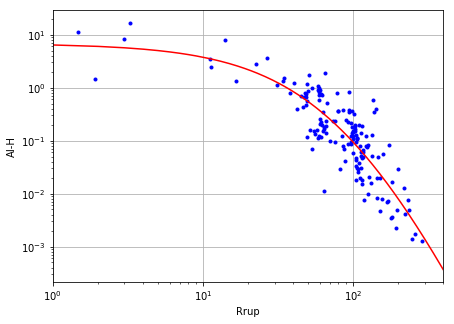

In [210]:
AIHH = np.log10(AIH)

z1,z2,z3 = polyfit(func,Rrup,AIHH)

xx =  np.arange(1, 400, 1)
res = [10 ** func(i,z1,z2,z3) for i in xx]
  
print "fit function is: y = %10.4f * log10(x+%10f) +  %10.4f" % (z1,z2,z3)
print "r-squared is: %10.4f"  % (RMS(Rrup,AIHH,z1,z2,z3))


plt.figure(figsize=(7,5))
plt.loglog(Rrup,AIH,'b.')
plt.loglog(xx,res,'r-')
plt.xlim(1,400) 
plt.grid(True) 
plt.xlabel('Rrup')
plt.ylabel('AI-H')
plt.show()

C:\Users\aicesun\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


fit function is: y =    -3.6746 * log10(x+ 39.068494) +      6.2750
r-squared is:     1.1025


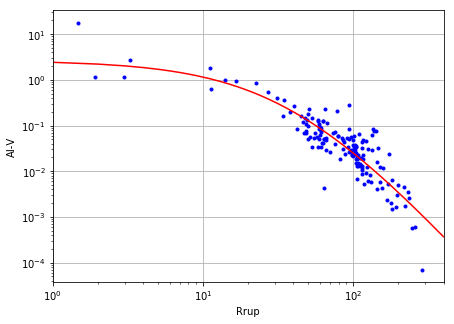

In [211]:
AIVV = np.log10(AIV)

z1,z2,z3 = polyfit(func,Rrup,AIVV)

xx =  np.arange(1, 400, 1)
res = [10 ** func(i,z1,z2,z3) for i in xx]
  
print "fit function is: y = %10.4f * log10(x+%10f) +  %10.4f" % (z1,z2,z3)
print "r-squared is: %10.4f"  % (RMS(Rrup,AIHH,z1,z2,z3))


plt.figure(figsize=(7,5))
plt.loglog(Rrup,AIV,'b.')
plt.loglog(xx,res,'r-')
plt.xlim(1,400) 
plt.grid(True) 
plt.xlabel('Rrup')
plt.ylabel('AI-V')
plt.show()

### CAV

C:\Users\aicesun\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


fit function is: y =    -3.0218 * log10(x+131.289248) +      7.8803
r-squared is:     0.6575


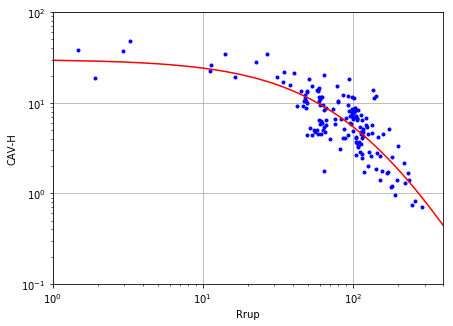

In [192]:
CAVHH = np.log10(CAVH)

z1,z2,z3 = polyfit(func,Rrup,CAVHH)

xx =  np.arange(1, 400, 1)
res = [10 ** func(i,z1,z2,z3) for i in xx]
        
print "fit function is: y = %10.4f * log10(x+%10f) +  %10.4f" % (z1,z2,z3)
print "r-squared is: %10.4f"  % (RMS(Rrup,CAVHH,z1,z2,z3))

plt.figure(figsize=(7,5))
plt.loglog(Rrup,CAVH,'b.')
plt.loglog(xx,res,'r-')
plt.xlim(1,400) 
plt.ylim(0.1,100) 
plt.grid(True) 
plt.xlabel('Rrup')
plt.ylabel('CAV-H')
plt.show()


C:\Users\aicesun\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


fit function is: y =    -1.8955 * log10(x+ 63.606760) +      4.6753
r-squared is:     0.7175


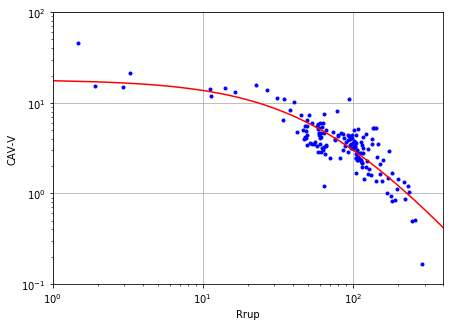

In [193]:
CAV0 = np.log10(CAVV)

m1,m2,m3 = polyfit(func,Rrup,CAV0)

xx =  np.arange(1, 400, 1)
res0 = [10 ** func(i,m1,m2,m3) for i in xx]
        
print "fit function is: y = %10.4f * log10(x+%10f) +  %10.4f" % (m1,m2,m3)
print "r-squared is: %10.4f"  % (RMS(Rrup,CAV0,m1,m2,m3))

plt.figure(figsize=(7,5))
plt.loglog(Rrup,CAVV,'b.')
plt.loglog(xx,res0,'r-')
plt.xlim(1,400) 
plt.ylim(0.1,100) 
plt.grid(True) 
plt.xlabel('Rrup')
plt.ylabel('CAV-V')
plt.show()

### 机器学习：数据拟合与广义线性回归

In [153]:
from sklearn.linear_model import LinearRegression

### 最小二乘法

In [91]:
from scipy.optimize import leastsq  ##引入最小二乘法算法

### 例1

cost：3
最小二乘法求解的拟合直线为:
y=0.44log10(x)+1.18
curve_fit拟合求解的拟合直线为:
fit function is: y =     0.4399 * log10(x) +      1.1802


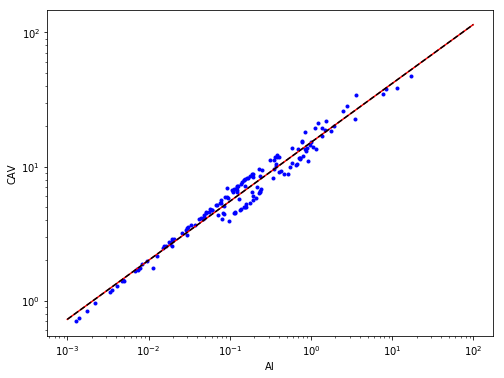

In [176]:
##需要拟合的函数func :指定函数的形状
def func(p,x):
    k,b=p
    return k*x+b

##偏差函数：x,y都是列表:这里的x,y更上面的Xi,Yi中是一一对应的
def error(p,x,y):
    return func(p,x)-y

def func2(x, a, b):
    y = a * x + b
    return y

x = np.log10(AIH)
y = np.log10(CAVH)

#k,b的初始值，可以任意设定,经过几次试验，发现p0的值会影响cost的值
p0=[0.5,10]

#把error函数中除了p0以外的参数打包到args中(使用要求)

Para=leastsq(error,p0,args=(x,y)) #最小二乘法


popt, pcov = curve_fit(func2,x,y) # curve_fit拟合

#读取结果
k,b=Para[0]

print("cost："+str(Para[1]))
print("最小二乘法求解的拟合直线为:")
print("y="+str(round(k,2))+"log10(x)+"+str(round(b,2)))

print("curve_fit拟合求解的拟合直线为:")

print "fit function is: y = %10.4f * log10(x) +  %10.4f" % (popt[0],popt[1])

#绘图，看拟合效果.matplotlib默认不支持中文，label设置中文的话需要另行设置,如果报错，改成英文就可以


#画样本点
plt.figure(figsize=(8,6)) ##指定图像比例： 8：6
plt.loglog(AIH,CAVH,'b.')

#画拟合直线
xx =  np.arange(0.001, 100, 1)

yy = 10 ** func2(np.log10(xx), popt[0],popt[1])

yy2 = 10 ** (k*np.log10(xx)+b)  #最小二乘法


plt.loglog(xx,yy,'r-')

plt.loglog(xx,yy2,'k--')

plt.ylabel('CAV')
plt.xlabel('AI')
plt.show()


### 例2

C:\Users\aicesun\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
C:\Users\aicesun\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()


cost：1
最小二乘法求解的拟合直线为:
fit function is: y =    -3.0220 * log10(x+131.306300) +     7.8809
curve_fit拟合求解的拟合直线为:
fit function is: y =    -3.0218 * log10(x+131.289248) +     7.8803


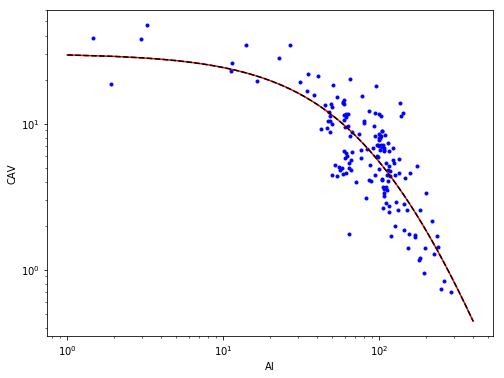

In [184]:
##需要拟合的函数func :指定函数的形状
def func(p,x):
    a,b,c=p
    return a*np.log10(x+b)+c

##偏差函数：x,y都是列表:这里的x,y更上面的Xi,Yi中是一一对应的
def error(p,x,y):
    return func(p,x)-y

def func2(x,a, b,c):
    y = a * np.log10(x+b) + c
    return y

def polyfit(func,x, y):
    results = {}
    popt, pcov = curve_fit(func, x, y)
    results = popt
    return results


x = Rrup
y = np.log10(CAVH)


#k,b的初始值，可以任意设定,经过几次试验，发现p0的值会影响cost的值
p0=[0.5,1,1]

#把error函数中除了p0以外的参数打包到args中(使用要求)

Para=leastsq(error,p0,args=(x,y)) #最小二乘法


z1,z2,z3 = polyfit(func2,x,y) # curve_fit拟合

#读取结果
a,b,c=Para[0]

print("cost："+str(Para[1]))
print("最小二乘法求解的拟合直线为:")
print "fit function is: y = %10.4f * log10(x+%10f) + %10.4f" % (round(a,4),round(b,4),round(c,4))

print("curve_fit拟合求解的拟合直线为:")
print "fit function is: y = %10.4f * log10(x+%10f) + %10.4f" % (z1,z2,z3)

#绘图，看拟合效果.matplotlib默认不支持中文，label设置中文的话需要另行设置,如果报错，改成英文就可以


#画样本点
plt.figure(figsize=(8,6)) ##指定图像比例： 8：6
plt.loglog(Rrup,CAVH,'b.')

#画拟合直线
xx =  np.arange(1, 400, 1)

yy = 10 ** func2(xx,z1,z2,z3) # curve_fit拟合

yy2 = 10 ** (a*np.log10(xx+b)+c)  #最小二乘法


plt.loglog(xx,yy,'r-') # curve_fit拟合

plt.loglog(xx,yy2,'k--')  #最小二乘法

plt.ylabel('CAV')
plt.xlabel('AI')
plt.show()

### GMPE

In [368]:
GMPES = get_available_gsims()

gmpe = "Bradley2013"

gmpe_list = ["Bradley2013"]

imts = ["PGA"]

params = {"ztor": 0.0,         # Top of rupture depth
         "hypo_depth": 10.0,   # Hypocentral depth
         "vs30": 250.0,        # Vs30 for all sites
         "vs30measured": True, # Vs30 value is measured
         "z1pt0": 100.0,       # Depth (m) to the 1.0 km/s Vs interface 
         "dip": 38.0,          # Vertical Fault
         "rake": 128.0           # Strike-slip fault
         }

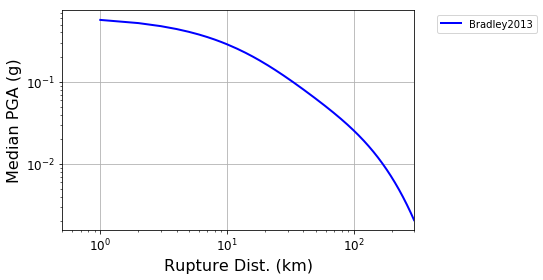

In [369]:
magnitudes = 6.5

distances = {"repi": np.arange(0.0, 300.0, 1.0)}

distances["rhypo"] = np.sqrt(distances["repi"] ** 2.0 + params["hypo_depth"] ** 2)

distances["rjb"] = distances["repi"]

distances["rrup"] = np.sqrt(distances["rjb"] ** 2.0 + params["ztor"] ** 2)

distances["rx"] = distances["rjb"]

import smtk.trellis.trellis_plots as trpl


ss = trpl.DistanceIMTTrellis(magnitudes, distances, gmpe_list, imts, params,
                                           distance_type="rrup", plot_type="loglog", figure_size=(6,4))